In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [4]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [5]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Test_Set *****
       PassengerId      Pclass      

In [6]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
test.isna().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [9]:
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
train.fillna(train.mean(), inplace=True)

In [11]:
test.fillna(test.mean(), inplace=True)

In [12]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [14]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [15]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [21]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.4 KB


In [24]:
X = np.array(train.drop(['Survived'], 1).astype(float))

In [25]:
y = np.array(train['Survived'])

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [27]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


In [29]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


In [31]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6262626262626263


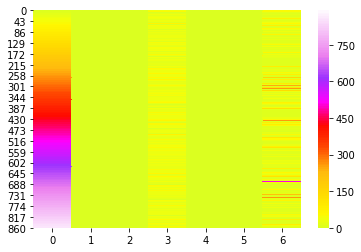

In [34]:
import seaborn as sns
heatmap_plot = sns.heatmap(X, center=0, cmap='gist_ncar')
plt.show()

61296331.43090016
17086356.06174566
8893161.225846995
6015566.770769251


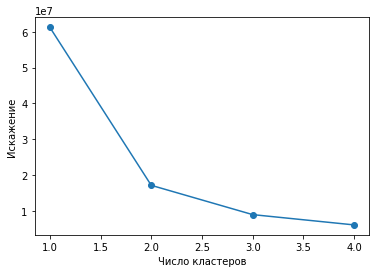

In [35]:
import numpy as np
distortions = []
for i in range(1,5):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10 , max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(1, 5), distortions, marker='o')
plt.xlabel('Чиcлo кластеров')
plt.ylabel('Искажение')
plt.show()

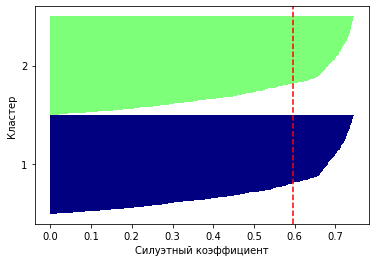

In [36]:
#Силуэтный график
km = KMeans(n_clusters= 2, init='k-means++', n_init=10, max_iter = 300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
import numpy as пр
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower , y_ax_upper = 0 , 0
yticks = []
for i , c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters) 
    plt.barh(range(y_ax_lower , y_ax_upper) ,c_silhouette_vals ,height= 1.0 ,edgecolor = 'none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle= "--")
plt.yticks(yticks , cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Силуэтный коэффициент')
plt.show()

In [38]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(X, metric= 'euclidean')))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,66.047434,4.738737,47.804001,13.661625,9.313238,55.274543,25.399422,10.491903,25.841612,...,881.069473,882.007183,883.027498,884.005679,885.448765,886.033895,887.300154,888.183943,889.302852,890.056880
1,66.047434,0.000000,64.531188,18.537324,63.422790,63.544357,25.693724,62.152018,61.619985,48.368070,...,882.297555,883.240952,884.150219,885.432051,885.022216,886.987003,887.165323,888.332105,889.041231,891.290907
2,4.738737,64.531188,0.000000,46.127873,9.274461,4.895700,52.302045,28.016468,7.161926,26.180841,...,879.028441,880.012907,881.007168,882.001568,883.364274,884.016264,885.305205,886.146551,887.277468,888.020850
3,47.804001,18.537324,46.127873,0.000000,45.127625,45.066404,19.326961,46.266625,43.118487,31.754434,...,879.168596,880.129728,881.060021,882.262774,882.351858,883.947968,884.447065,885.516924,886.347906,888.167001
4,13.661625,63.422790,9.274461,45.127625,0.000000,5.409812,47.838637,35.744239,9.721458,30.885525,...,877.002294,878.100270,879.031855,880.057384,881.275868,882.050737,883.420513,884.153414,885.320169,886.005130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886.033895,886.987003,884.016264,883.947968,882.050737,881.016409,881.271975,879.398775,878.005401,877.263593,...,9.383648,7.011903,4.031129,6.663520,20.784986,0.000000,18.867962,11.291047,17.320508,8.340414
887,887.300154,887.165323,885.305205,884.447065,883.420513,882.330729,881.966535,880.217959,879.243398,878.015379,...,26.936883,20.435239,21.891779,24.014631,20.827041,18.867962,0.000000,12.937296,7.348469,26.039633
888,888.183943,888.332105,886.146551,885.516924,884.153414,883.130653,882.797714,881.441933,880.090897,879.167957,...,17.545055,16.356854,14.233394,17.692985,11.735077,11.291047,12.937296,0.000000,8.221069,16.179742
889,889.302852,889.041231,887.277468,886.347906,885.320169,884.272429,883.714303,882.379542,881.207667,880.083522,...,24.608853,21.203749,20.524376,23.594544,14.688963,17.320508,7.348469,8.221069,0.000000,23.153024


In [39]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(X, metric= 'euclidean'), method= 'complete')

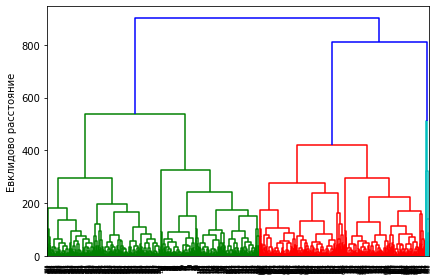

In [40]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(X, metric= 'euclidean'), method= 'complete')
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Евклидово расстояние')
plt.show()

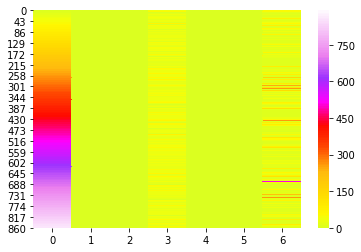

In [41]:
import seaborn as sns
heatmap_plot = sns.heatmap(X, center=0, cmap='gist_ncar')
plt.show()

In [48]:
# If classes members are completely split across different clusters, 
# the assignment is totally incomplete, hence the ARI is very low:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=200).fit(X)
y_pred = kmeans.predict(X)
clusters = dbscan.fit_predict(X)
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("ARI =", adjusted_rand_score(y,y_pred))
#DBSCAN performance:
print("ARI =", adjusted_rand_score(y,clusters))

ARI = 0.014952883466138945
ARI = 0.0
